# Libraries and data importing

Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.stattools import acf, pacf

In [3]:
from sklearn.metrics import r2_score, mean_absolute_error

Importing data

In [4]:
activities = pd.read_parquet('../data-raw/activities.parquet')
activities

,contributor,category,repository,activity,date
0,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:19+00:00
1,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:23+00:00
2,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:26+00:00
3,analysis-bot,bot,facebook/react-native,Commenting pull request,2022-11-25 09:55:27+00:00
4,neos-bot,bot,neos/neos-ui-compiled,Pushing commits,2022-11-25 09:55:47+00:00
...,...,...,...,...,...
1015418,798388,human,879434,Reviewing code,2023-04-15 16:06:15+00:00
1015419,798388,human,879434,Reviewing code,2023-04-15 16:07:26+00:00
1015420,784775,human,643744,Creating branch,2023-04-15 16:07:33+00:00
1015421,784775,human,888378,Opening pull request,2023-04-15 16:08:07+00:00


Adding artifitial bots

In [ ]:
sgl_bot_1 = ['lgtm-com[bot]', 'codeclimate[bot]', 'adobe-bot', 'renovate-approve-2[bot]', 'openshift-cherrypick-robot', 'sourcegraph-bot', 'delete-merged-branch[bot]', 'aws-cdk-automation', 'sprucelabs-ci', 'swift-ci', 'blathers-crl[bot]', 'codesandbox[bot]', 'gitguardian[bot]', 'restyled-io[bot]', 'ballerina-bot', 'r-ryantm', 'nextcloud-bot', 'bot-gradle', 'dotnet-bot', 'edx-requirements-bot', 'sagemaker-bot', 'engine-flutter-autoroll', 'google-oss-bot', 'mumukibot', 'skia-flutter-autoroll', 'docker-library-bot', 'review-notebook-app[bot]', 'nodejs-github-bot', 'rust-timer', 'welcome[bot]', 'rultor', 'gatsby-cloud[bot]', 'openhab-bot', 'graalvmbot', 'apmmachine', 'submariner-bot', 'metamaskbot', 'jetstack-bot', 'fluttergithubbot', 'flinkbot', 'violinist-bot', 'softwarefactory-project-zuul[bot]', 'mm-cloud-bot', 'elife-bot', 'cf-gitbot', 'wso2-jenkins-bot', 'linux-foundation-easycla[bot]', 'jitsi-jenkins', 'vc-ci', 'rustbot', 'bors-servo', 'guardrails[bot]', 'usercont-release-bot', 'nur-bot', 'metal3-io-bot', 'repo-ranger[bot]', 'status-im-auto', 'hft-team-city', 'vscode-issue-tracker-bot', 'backportbot-nextcloud[bot]', 'forking-renovate[bot]', 'cla-bot[bot]', 'google-ml-butler[bot]', 'angular-automatic-lock-bot[bot]', 'livingdocs-automation', 'niveristand-diff-bot', 'cypress-bot[bot]', 'miss-islington', 'aporeto-bot', 'getsentry-bot', 'devOpsHazelcast', 'fossabot', 'pirate-bot', 'cozy-bot', 'ibmdotcom-bot', 'ninjadotorg-bot', 'dontcallmedom-bot', 'pytorchbot', 'hasura-bot', 'mender-test-bot', 'translatewiki', 'graviteeio', 'vtex-io-ci-cd[bot]', 'mister-roboto', 'octokit-fixture-user-a', 'robot-clickhouse', 'nacho-bot', 'CrowdinBot', 'ks-ci-bot', 'netkan-bot', 'AppVeyorBot', 'moz-wptsync-bot', 'bedevere-bot', 'Code-Inside-Bot', 'openssl-machine', 'vmwclabot', 'soloio-bot', 'stakater-user', 'boring-cyborg[bot]', 'hashicorp-cla', 'pdfjsbot', 'scrutinizer-notifier', 'taichi-gardener', 'confs-tech-bot', 'dotnet-maestro-bot', 'bluespice-github-bot', 'oll-bot', 'edx-transifex-bot', 'jbosstm-bot', 'kubevirt-commenter-bot', 'spinnakerbot', 'istio-policy-bot', 'sentry-io[bot]', 'minikube-bot', 'qmk-bot', 'gitpod-io[bot]', 'cheminfo-bot', 'minio-trusted', 'agones-bot', 'dotnet-issue-labeler[bot]', 'DrahtBot', 'addonsbot', 'alluxio-bot', 'similar-code-searcher[bot]', 'ansibot', 'tykbot[bot]', 'dlang-bot', 'va-bot', 'johnpbloch-bot', 'analysis-bot', 'lingohub[bot]', 'neos-bot', 'ionitron-bot[bot]', 'minikube-pr-bot', 'vtex-io-docs-bot[bot]', 'pantheon-ci-bot', 'bits-bot', 'knative-prow-robot', 'PJBot', 'pivotal-cla', 'fire-bot', 'garybot2', 'release-drafter[bot]', '0crat', 'octokitbot', 'carsonbot', 'wet-boew-bot', 'thundernest-bot', 'cmsdmwmbot', 'jujubot', 'salesforce-cla[bot]', 'spring-builds', 'sre-bot', 'jenkins-x-bot-test', 'nodebb-misty']
sgl_bot_2 = ['lgtm-com[bot]', 'codeclimate[bot]', 'adobe-bot', 'renovate-approve-2[bot]', 'openshift-cherrypick-robot', 'sourcegraph-bot', 'delete-merged-branch[bot]', 'aws-cdk-automation', 'sprucelabs-ci', 'swift-ci', 'blathers-crl[bot]', 'codesandbox[bot]', 'gitguardian[bot]', 'restyled-io[bot]', 'ballerina-bot', 'r-ryantm', 'nextcloud-bot', 'bot-gradle', 'dotnet-bot', 'edx-requirements-bot', 'sagemaker-bot', 'engine-flutter-autoroll', 'google-oss-bot', 'mumukibot', 'skia-flutter-autoroll', 'docker-library-bot', 'review-notebook-app[bot]', 'nodejs-github-bot', 'rust-timer', 'welcome[bot]', 'rultor', 'gatsby-cloud[bot]', 'openhab-bot', 'graalvmbot', 'apmmachine', 'submariner-bot', 'metamaskbot', 'jetstack-bot', 'fluttergithubbot', 'flinkbot', 'violinist-bot', 'softwarefactory-project-zuul[bot]', 'mm-cloud-bot', 'elife-bot', 'cf-gitbot', 'wso2-jenkins-bot', 'linux-foundation-easycla[bot]', 'jitsi-jenkins', 'vc-ci', 'rustbot', 'bors-servo', 'guardrails[bot]', 'usercont-release-bot', 'nur-bot', 'metal3-io-bot', 'repo-ranger[bot]', 'status-im-auto', 'hft-team-city', 'vscode-issue-tracker-bot', 'backportbot-nextcloud[bot]', 'forking-renovate[bot]', 'cla-bot[bot]', 'google-ml-butler[bot]', 'angular-automatic-lock-bot[bot]', 'livingdocs-automation', 'niveristand-diff-bot', 'cypress-bot[bot]', 'miss-islington', 'aporeto-bot', 'getsentry-bot', 'devOpsHazelcast', 'fossabot']
sgl_bot_3 = ['pirate-bot', 'cozy-bot', 'ibmdotcom-bot', 'ninjadotorg-bot', 'dontcallmedom-bot', 'pytorchbot', 'hasura-bot', 'mender-test-bot', 'translatewiki', 'graviteeio', 'vtex-io-ci-cd[bot]', 'mister-roboto', 'octokit-fixture-user-a', 'robot-clickhouse', 'nacho-bot', 'CrowdinBot', 'ks-ci-bot', 'netkan-bot', 'AppVeyorBot', 'moz-wptsync-bot', 'bedevere-bot', 'Code-Inside-Bot', 'openssl-machine', 'vmwclabot', 'soloio-bot', 'stakater-user', 'boring-cyborg[bot]', 'hashicorp-cla', 'pdfjsbot', 'scrutinizer-notifier', 'taichi-gardener', 'confs-tech-bot', 'dotnet-maestro-bot', 'bluespice-github-bot', 'oll-bot', 'edx-transifex-bot', 'jbosstm-bot', 'kubevirt-commenter-bot', 'spinnakerbot', 'istio-policy-bot', 'sentry-io[bot]', 'minikube-bot', 'qmk-bot', 'gitpod-io[bot]', 'cheminfo-bot', 'minio-trusted', 'agones-bot', 'dotnet-issue-labeler[bot]', 'DrahtBot', 'addonsbot', 'alluxio-bot', 'similar-code-searcher[bot]', 'ansibot', 'tykbot[bot]', 'dlang-bot', 'va-bot', 'johnpbloch-bot', 'analysis-bot', 'lingohub[bot]', 'neos-bot', 'ionitron-bot[bot]', 'minikube-pr-bot', 'vtex-io-docs-bot[bot]', 'pantheon-ci-bot', 'bits-bot', 'knative-prow-robot', 'PJBot', 'pivotal-cla', 'fire-bot', 'garybot2', 'release-drafter[bot]', '0crat', 'octokitbot', 'carsonbot', 'wet-boew-bot', 'thundernest-bot', 'cmsdmwmbot', 'jujubot', 'salesforce-cla[bot]', 'spring-builds', 'sre-bot', 'jenkins-x-bot-test', 'nodebb-misty']

extended_activities = (
    pd.concat(
        [
            activities, 
            activities[activities['contributor'].isin(sgl_bot_1)].assign(contributor='sgl-bot-1'),
            activities[activities['contributor'].isin(sgl_bot_2)].assign(contributor='sgl-bot-2'),
            activities[activities['contributor'].isin(sgl_bot_3)].assign(contributor='sgl-bot-3')
        ], 
        ignore_index=True
    )
)
extended_activities

600 events for each contributor

In [5]:
data = ( 
    activities
    # keep the last 600 events for each contributor
    .groupby('contributor')
    .tail(600)
    # keep the contributors who have 600 events
    .groupby('contributor')
    .filter(lambda x: len(x) == 600)
)
data

,contributor,category,repository,activity,date
365,nodebb-misty,bot,julianlam/nodebb-plugin-email-helper,Closing pull request,2022-11-25 11:08:46+00:00
409,nodebb-misty,bot,NodeBB/nodebb-plugin-topic-redirect,Closing pull request,2022-11-25 11:20:10+00:00
417,nodebb-misty,bot,NodeBB/nodebb-plugin-write-api,Closing pull request,2022-11-25 11:21:23+00:00
523,nodebb-misty,bot,julianlam/nodebb-plugin-sso-oauth,Closing pull request,2022-11-25 11:47:30+00:00
5518,jenkins-x-bot-test,bot,jenkins-x-charts/jxboot-helmfile-resources,Creating branch,2022-11-26 19:57:10+00:00
...,...,...,...,...,...
1015418,798388,human,879434,Reviewing code,2023-04-15 16:06:15+00:00
1015419,798388,human,879434,Reviewing code,2023-04-15 16:07:26+00:00
1015420,784775,human,643744,Creating branch,2023-04-15 16:07:33+00:00
1015421,784775,human,888378,Opening pull request,2023-04-15 16:08:07+00:00


# Evaluation metrics

In [6]:
def pga_score(y_true, y_pred):
    return (y_pred >= y_true).mean()

In [7]:
def ctd_score(y_true, y_pred, target_value):

    true_cumsum, pred_cumsum = np.cumsum(y_true), np.cumsum(y_pred)
    time_true, time_pred = np.argmax(true_cumsum >= target_value), np.argmax(pred_cumsum >= target_value)

    # display(true_cumsum.tolist(), pred_cumsum.tolist())


    if sum(y_pred) < target_value:    # target value never reached in predictions
        ctd = time_true - len(y_true)
        flag = -1
    elif sum(y_true) < target_value:      # target value never reached in reality
        ctd = len(y_pred) - time_pred
        flag = 0
    else:
        ctd = time_true - time_pred
        flag = 1

    return ctd, flag

In [ ]:
true_values = [2, 11, 84, 57, 0, 38, 15, 80, 4, 30, 90, 0, 0, 500]
pred_values = [52, 22, 95, 9, 11, 1, 73, 0, 30, 50, 2, 700, 3, 0]

print("Cumulative Time Difference:", ctd_score(true_values, pred_values, 1000))

# Time ranges

In [8]:
time_ranges = (
    data
    .groupby(['category', 'contributor'])['date']
    .agg(lambda x: int((x.iat[-1] - x.iat[0]).total_seconds()/3600))
    .reset_index(name='duration')
)
time_ranges.sort_values(by='duration')

,category,contributor,duration
77,bot,lgtm-com[bot],36
30,bot,codeclimate[bot],48
7,bot,adobe-bot,55
115,bot,renovate-approve-2[bot],61
105,bot,openshift-cherrypick-robot,64
...,...,...,...
135,bot,sre-bot,3237
219,human,748599,3278
157,human,353444,3287
69,bot,jenkins-x-bot-test,3340


<Axes: ylabel='duration'>

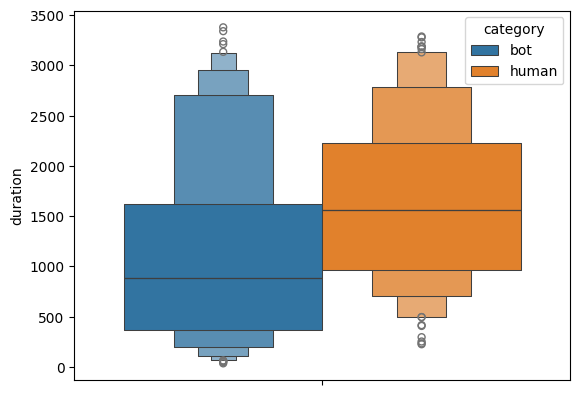

In [9]:
sns.boxenplot(time_ranges, y='duration', hue='category')

Maps a range duration (in seconds) to frequency format.

In [10]:
def range_to_frequency(contributor):
    
    train = contributor.head(300)
    train = train[train['date'] >= train['date'].max() - pd.DateOffset(months=3)]
    mean_range_s = int((train['date'].iloc[-1] - train['date'].iloc[0]).total_seconds())//len(train)

    if mean_range_s >= 60*60*24:
        return 'D'
    if mean_range_s >= 60*60:
        mean_range_h = mean_range_s//3600
        freq = 24//((24//mean_range_h)+1) if mean_range_h > 1 else 1
        return str(freq)+'H'
    elif mean_range_s >= 60:
        mean_range_m = mean_range_s//60
        freq = 60//((60//mean_range_m)+1) if mean_range_m > 1 else 1
        return str(freq)+'T'
    else:
        freq = 60//((60//mean_range_s)+1)if mean_range_s > 1 else 1
        return str(freq)+'S'

Mapping seasonality

In [11]:
def frequency_to_seasonality(freq):
    if len(freq) == 1:
        freq = '1'+freq

    if freq[-1] == 'D':
        return 7
    elif freq[-1] == 'H':
        return 24//int(freq[:-1])
    elif freq[-1] == 'T':
        return 24*(60//int(freq[:-1]))
    else:
        return None

In [43]:
# Example usage:
random_name = data['contributor'].sample().values[0]
random_user = data[data['contributor'] == random_name]
freq = range_to_frequency(random_user)
print(random_name, ' -> ',freq, ' -> ', frequency_to_seasonality(freq))

vscode-issue-tracker-bot  ->  30T  ->  48


# Data splitting

In [16]:
def split_activities(contributor):

    frequency = range_to_frequency(contributor)

    result = (
        contributor
        .groupby([pd.Grouper(key='date', freq=frequency)])['activity']
        .count()
        .reset_index(name='n_activities')
        .set_index('date')
        .resample(frequency)
        .sum()
        .rename_axis(None)
        .assign(
            cumsum_activities = lambda x: x['n_activities'].cumsum()
        )
    )

    train, test = (
        result[result['cumsum_activities'] <= 300]
        .apply(lambda x : x[x.index >= x.index.max() - pd.DateOffset(months=3)])
        .drop('cumsum_activities', axis=1),

        result[result['cumsum_activities'] > 300]
        .drop('cumsum_activities', axis=1)
    )

    return train, test

<Axes: >

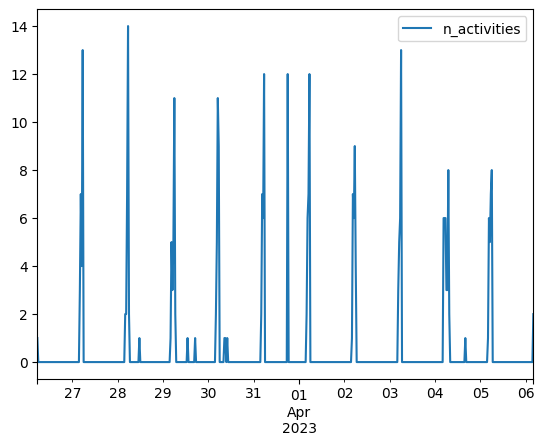

In [17]:
train, test = split_activities(data[data['contributor'] == 'usercont-release-bot'])
train.plot()

# 1. Seasonal Autoregressive integrated Moving-average model

In [ ]:
def sarima_model(contributor):

    contributor_name = contributor['contributor'].iloc[0]
    contributor_category = contributor['category'].iloc[0]
    print(contributor_name)

    train, test = split_activities(contributor)
    freq = train.index.freq.freqstr

    # choosing best number of lags (possible seasonality)
    acf_values, _ = acf(train['n_activities'].values, nlags=int((len(train)/3)), alpha=0.05)
    lags = np.argmax(acf_values[1:])+1

    # choosing appropriate model parameters
    if lags > 1:
        order = (1, 1, 1)
        seasonal_order = (1, 1, 1, lags)
    else:
        # for short time range, no seasonality
        order = (int((len(train)/3)), 1, 0)
        seasonal_order = None

    model = SARIMAX(
        train['n_activities'],
        order = order,
        seasonal_order = seasonal_order, 
        enforce_invertibility = True, 
        enforce_stationarity = False
        ).fit(disp=False, method='lbfgs')

    # Forecast the test set using confidence interval with 95%
    predictions = model.get_prediction(start=len(train), end=len(train)+len(test)-1).summary_frame(alpha=0.05)

    metrics = pd.Series({
        'contributor': contributor_name,
        'category': contributor_category,
        'r2': r2_score(test['n_activities'], predictions['mean']),
        'mae': mean_absolute_error(test['n_activities'], predictions['mean']),
        'pga': pga_score(test['n_activities'], predictions['mean']),
        'ctd_100': ctd_score(test['n_activities'], predictions['mean'], 100),
        'ctd_200': ctd_score(test['n_activities'], predictions['mean'], 200),
        'ctd_300': ctd_score(test['n_activities'], predictions['mean'], 300),
        'n_activities': train['n_activities'].sum(),
        'frequency': freq,
        'data_points':len(train),
        'lags':lags
    })

    return metrics

In [18]:
def sarima_model(contributor):

    contributor_name = contributor['contributor'].iloc[0]
    contributor_category = contributor['category'].iloc[0]
    train, test = split_activities(contributor)
    freq = train.index.freq.freqstr
    seasonality = frequency_to_seasonality(freq)

    print(contributor_name, freq, seasonality)

    # choosing best parameters (possible seasonality)
    if seasonality and (len(train)//seasonality) >= 2:
        order = (1, 1, 1)
        seasonal_order = (1, 1, 1, seasonality)
    else:
        order = (int((len(train)/3)), 1, 0)
        seasonal_order = None
        seasonality = None

    model = SARIMAX(
        train['n_activities'],
        order = order,
        seasonal_order = seasonal_order, 
        enforce_invertibility = True, 
        enforce_stationarity = False
        ).fit(disp=False, method='lbfgs')

    # Forecast the test set using confidence interval with 95%
    predictions = model.get_prediction(start=len(train), end=len(train)+len(test)-1).summary_frame(alpha=0.05)

    metrics = pd.Series({
        'contributor': contributor_name,
        'category': contributor_category,
        'r2': r2_score(test['n_activities'], predictions['mean']),
        'mae': mean_absolute_error(test['n_activities'], predictions['mean']),
        'pga': pga_score(test['n_activities'], predictions['mean']),
        'ctd_100': ctd_score(test['n_activities'], predictions['mean'], 100)[0],
        'ctd_200': ctd_score(test['n_activities'], predictions['mean'], 200)[0],
        'ctd_300': ctd_score(test['n_activities'], predictions['mean'], 300)[0],
        'flag_300': ctd_score(test['n_activities'], predictions['mean'], 300)[1],
        'n_activities': train['n_activities'].sum(),
        'frequency': freq,
        'seasonality':seasonality,
        'data_points':len(train),
    })

    return metrics

In [27]:
sarima_results = data.groupby(['category', 'contributor']).apply(sarima_model).reset_index(drop=True)

0crat H 24
AppVeyorBot H 24
Code-Inside-Bot H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


CrowdinBot H 24
DrahtBot H 24
PJBot 4H 6
addonsbot 4H 6
adobe-bot 3T 480


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


agones-bot H 24
alluxio-bot 2H 12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


analysis-bot 3H 8
angular-automatic-lock-bot[bot] 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ansibot 2H 12
apmmachine 20T 72
aporeto-bot H 24
aws-cdk-automation 3T 480
backportbot-nextcloud[bot] 30T 48
ballerina-bot 10T 144


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


bedevere-bot H 24
bits-bot 3H 8
blathers-crl[bot] 7T 192
bluespice-github-bot H 24
boring-cyborg[bot] H 24
bors-servo 30T 48
bot-gradle 20T 72
carsonbot 4H 6
cf-gitbot 30T 48
cheminfo-bot H 24
cla-bot[bot] 30T 48
cmsdmwmbot 4H 6
codeclimate[bot] 2T 720
codesandbox[bot] 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


confs-tech-bot H 24
cozy-bot H 24
cypress-bot[bot] H 24
delete-merged-branch[bot] 4T 360
devOpsHazelcast 30T 48
dlang-bot 2H 12
docker-library-bot 30T 48
dontcallmedom-bot H 24
dotnet-bot 15T 96


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


dotnet-issue-labeler[bot] H 24
dotnet-maestro-bot H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


edx-requirements-bot 15T 96


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


edx-transifex-bot H 24
elife-bot 20T 72
engine-flutter-autoroll 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


fire-bot 4H 6
flinkbot 20T 72
fluttergithubbot 30T 48
forking-renovate[bot] 30T 48
fossabot H 24
garybot2 4H 6
gatsby-cloud[bot] 20T 72
getsentry-bot H 24
gitguardian[bot] 10T 144


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


gitpod-io[bot] 30T 48
google-ml-butler[bot] H 24
google-oss-bot 20T 72
graalvmbot 20T 72
graviteeio 30T 48
guardrails[bot] 30T 48
hashicorp-cla H 24
hasura-bot H 24
hft-team-city H 24
ibmdotcom-bot H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ionitron-bot[bot] 3H 8
istio-policy-bot H 24
jbosstm-bot 2H 12
jenkins-x-bot-test 6H 4
jetstack-bot 30T 48
jitsi-jenkins 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


johnpbloch-bot 2H 12
jujubot 4H 6
knative-prow-robot 3H 8
ks-ci-bot H 24
kubevirt-commenter-bot H 24
lgtm-com[bot] 4T 360
lingohub[bot] 2H 12
linux-foundation-easycla[bot] 30T 48
livingdocs-automation H 24
mender-test-bot H 24
metal3-io-bot 30T 48
metamaskbot 30T 48
minikube-bot 2H 12
minikube-pr-bot 3H 8
minio-trusted H 24
miss-islington H 24
mister-roboto H 24
mm-cloud-bot 30T 48
moz-wptsync-bot H 24
mumukibot 12T 120


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


nacho-bot H 24
neos-bot 3H 8
netkan-bot H 24
nextcloud-bot 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ninjadotorg-bot H 24
niveristand-diff-bot 30T 48
nodebb-misty 4H 6
nodejs-github-bot 20T 72
nur-bot 30T 48
octokit-fixture-user-a 30T 48
octokitbot H 24
oll-bot H 24
openhab-bot 20T 72
openshift-cherrypick-robot 4T 360
openssl-machine H 24
pantheon-ci-bot H 24
pdfjsbot H 24
pirate-bot H 24
pivotal-cla 4H 6
pytorchbot H 24
qmk-bot H 24
r-ryantm 4T 360
release-drafter[bot] 3H 8
renovate-approve-2[bot] 3T 480
repo-ranger[bot] 30T 48
restyled-io[bot] T 1440
review-notebook-app[bot] 20T 72
robot-clickhouse H 24
rultor 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


rust-timer 20T 72
rustbot 30T 48
sagemaker-bot 20T 72
salesforce-cla[bot] 4H 6
scrutinizer-notifier H 24
sentry-io[bot] H 24
similar-code-searcher[bot] 2H 12
skia-flutter-autoroll 20T 72
softwarefactory-project-zuul[bot] 30T 48
soloio-bot H 24
sourcegraph-bot 3T 480
spinnakerbot 2H 12
spring-builds 4H 6
sprucelabs-ci 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


sre-bot H 24
stakater-user 30T 48
status-im-auto 30T 48
submariner-bot 20T 72
swift-ci 7T 192
taichi-gardener H 24
thundernest-bot 4H 6
translatewiki H 24
tykbot[bot] 3H 8
usercont-release-bot 30T 48
va-bot 3H 8
vc-ci 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


violinist-bot 30T 48
vmwclabot H 24
vscode-issue-tracker-bot 30T 48
vtex-io-ci-cd[bot] H 24
vtex-io-docs-bot[bot] 2H 12
welcome[bot] 20T 72
wet-boew-bot 4H 6
wso2-jenkins-bot 30T 48
335498 30T 48
335745 3H 8
353444 2H 12
355383 2H 12
359854 H 24
364686 30T 48
367939 H 24
368375 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


373769 3H 8
374774 H 24
376887 H 24
377538 30T 48
377543 3H 8
387658 H 24
387854 H 24
437693 30T 48
437766 H 24
438655 4H 6
446498 30T 48
449544 3H 8
449583 H 24
454496 H 24
454638 4H 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


455745 30T 48
456995 4H 6
459877 H 24
465566 30T 48
473965 30T 48
475849 3H 8
483648 4H 6
487355 3H 8
489848 3H 8
535599 3H 8
537443 H 24
543595 H 24
549789 H 24
553976 H 24
558473 H 24
567384 H 24
567396 3H 8
567743 4H 6
576539 30T 48
578794 4H 6
579369 2H 12
587344 2H 12
597849 H 24
645363 H 24
646677 H 24
646795 2H 12
648358 H 24
656549 2H 12
658766 2H 12
658938 H 24
664498 2H 12
664693 H 24
668867 H 24
669693 H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


673338 30T 48
674548 H 24
689788 4H 6
733774 30T 48
735987 H 24
743485 H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


744346 4H 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


748599 2H 12
754548 30T 48
754564 H 24
755587 H 24
757389 30T 48
758333 H 24
763394 H 24
767954 H 24
769343 H 24
769399 H 24
773356 H 24
783656 4H 6
784775 H 24
787773 H 24
795565 H 24
795985 H 24
797989 30T 48
798388 2H 12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


843533 H 24
845398 3H 8
847775 H 24
849548 H 24
859454 3H 8
859754 2H 12
864856 H 24
864943 H 24
865858 2H 12
873354 H 24
885533 H 24
885899 H 24
893864 3H 8
896363 2H 12
897436 H 24
897688 30T 48
933837 H 24
946773 H 24
947579 30T 48
949698 2H 12
954443 30T 48
955787 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


957953 H 24
966834 3H 8
976375 H 24
977484 H 24
978678 30T 48
979384 2H 12
983548 H 24
983874 H 24
985588 H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


987894 H 24
988439 H 24


In [28]:
sarima_results.to_csv('../models-evaluation-v4/sarima_model_metrics.csv', index=False)

# 2. Unobserved components model

In [20]:
def uc_model(contributor):

    contributor_name = contributor['contributor'].iloc[0]
    contributor_category = contributor['category'].iloc[0]
    train, test = split_activities(contributor)
    freq = train.index.freq.freqstr
    seasonal = frequency_to_seasonality(freq)

    print(contributor_name, freq, seasonal)

    if (len(train)//seasonal) < 2:
        seasonal = None

    # choosing appropriate model parameters
    model = UnobservedComponents(
        train['n_activities'], 
        level = True, 
        seasonal = seasonal
        ).fit(disp=False, method='lbfgs')

    # Forecast the test set using confidence interval with 95%
    predictions = model.get_prediction(start=len(train), end=len(train)+len(test)-1).summary_frame(alpha=0.05)

    metrics = pd.Series({
        'contributor': contributor_name,
        'category': contributor_category,
        'r2': r2_score(test['n_activities'], predictions['mean']),
        'mae': mean_absolute_error(test['n_activities'], predictions['mean']),
        'pga': pga_score(test['n_activities'], predictions['mean']),
        'ctd_100': ctd_score(test['n_activities'], predictions['mean'], 100)[0],
        'ctd_200': ctd_score(test['n_activities'], predictions['mean'], 200)[0],
        'ctd_300': ctd_score(test['n_activities'], predictions['mean'], 300)[0],
        'flag_300': ctd_score(test['n_activities'], predictions['mean'], 300)[1],
        'n_activities': train['n_activities'].sum(),
        'frequency': freq,
        'seasonality':seasonal,
        'data_points':len(train),
    })

    return metrics

In [21]:
uc_results = data.groupby(['category', 'contributor']).apply(uc_model).reset_index(drop=True)

0crat H 24
AppVeyorBot H 24
Code-Inside-Bot H 24
CrowdinBot H 24
DrahtBot H 24
PJBot 4H 6
addonsbot 4H 6
adobe-bot 3T 480
agones-bot H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


alluxio-bot 2H 12
analysis-bot 3H 8
angular-automatic-lock-bot[bot] 30T 48
ansibot 2H 12
apmmachine 20T 72
aporeto-bot H 24
aws-cdk-automation 3T 480


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


backportbot-nextcloud[bot] 30T 48
ballerina-bot 10T 144
bedevere-bot H 24
bits-bot 3H 8
blathers-crl[bot] 7T 192
bluespice-github-bot H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


boring-cyborg[bot] H 24
bors-servo 30T 48
bot-gradle 20T 72
carsonbot 4H 6
cf-gitbot 30T 48
cheminfo-bot H 24
cla-bot[bot] 30T 48
cmsdmwmbot 4H 6
codeclimate[bot] 2T 720
codesandbox[bot] 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


confs-tech-bot H 24
cozy-bot H 24
cypress-bot[bot] H 24
delete-merged-branch[bot] 4T 360
devOpsHazelcast 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


dlang-bot 2H 12
docker-library-bot 30T 48
dontcallmedom-bot H 24
dotnet-bot 15T 96
dotnet-issue-labeler[bot] H 24
dotnet-maestro-bot H 24
edx-requirements-bot 15T 96
edx-transifex-bot H 24
elife-bot 20T 72
engine-flutter-autoroll 20T 72
fire-bot 4H 6
flinkbot 20T 72
fluttergithubbot 30T 48
forking-renovate[bot] 30T 48
fossabot H 24
garybot2 4H 6
gatsby-cloud[bot] 20T 72
getsentry-bot H 24
gitguardian[bot] 10T 144
gitpod-io[bot] 30T 48
google-ml-butler[bot] H 24
google-oss-bot 20T 72
graalvmbot 20T 72
graviteeio 30T 48
guardrails[bot] 30T 48
hashicorp-cla H 24
hasura-bot H 24
hft-team-city H 24
ibmdotcom-bot H 24
ionitron-bot[bot] 3H 8
istio-policy-bot H 24
jbosstm-bot 2H 12
jenkins-x-bot-test 6H 4
jetstack-bot 30T 48
jitsi-jenkins 30T 48
johnpbloch-bot 2H 12
jujubot 4H 6
knative-prow-robot 3H 8
ks-ci-bot H 24
kubevirt-commenter-bot H 24
lgtm-com[bot] 4T 360
lingohub[bot] 2H 12
linux-foundation-easycla[bot] 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


livingdocs-automation H 24
mender-test-bot H 24
metal3-io-bot 30T 48
metamaskbot 30T 48
minikube-bot 2H 12
minikube-pr-bot 3H 8
minio-trusted H 24
miss-islington H 24
mister-roboto H 24
mm-cloud-bot 30T 48
moz-wptsync-bot H 24
mumukibot 12T 120
nacho-bot H 24
neos-bot 3H 8
netkan-bot H 24
nextcloud-bot 20T 72
ninjadotorg-bot H 24
niveristand-diff-bot 30T 48
nodebb-misty 4H 6
nodejs-github-bot 20T 72
nur-bot 30T 48
octokit-fixture-user-a 30T 48
octokitbot H 24
oll-bot H 24
openhab-bot 20T 72
openshift-cherrypick-robot 4T 360
openssl-machine H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


pantheon-ci-bot H 24
pdfjsbot H 24
pirate-bot H 24
pivotal-cla 4H 6
pytorchbot H 24
qmk-bot H 24
r-ryantm 4T 360
release-drafter[bot] 3H 8
renovate-approve-2[bot] 3T 480
repo-ranger[bot] 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


restyled-io[bot] T 1440
review-notebook-app[bot] 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


robot-clickhouse H 24
rultor 20T 72
rust-timer 20T 72
rustbot 30T 48
sagemaker-bot 20T 72
salesforce-cla[bot] 4H 6
scrutinizer-notifier H 24
sentry-io[bot] H 24
similar-code-searcher[bot] 2H 12
skia-flutter-autoroll 20T 72
softwarefactory-project-zuul[bot] 30T 48
soloio-bot H 24
sourcegraph-bot 3T 480


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


spinnakerbot 2H 12
spring-builds 4H 6
sprucelabs-ci 8T 168
sre-bot H 24
stakater-user 30T 48
status-im-auto 30T 48
submariner-bot 20T 72
swift-ci 7T 192
taichi-gardener H 24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


thundernest-bot 4H 6
translatewiki H 24
tykbot[bot] 3H 8
usercont-release-bot 30T 48
va-bot 3H 8
vc-ci 20T 72
violinist-bot 30T 48
vmwclabot H 24
vscode-issue-tracker-bot 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


vtex-io-ci-cd[bot] H 24
vtex-io-docs-bot[bot] 2H 12
welcome[bot] 20T 72
wet-boew-bot 4H 6
wso2-jenkins-bot 30T 48
335498 30T 48
335745 3H 8
353444 2H 12
355383 2H 12
359854 H 24
364686 30T 48
367939 H 24
368375 20T 72
373769 3H 8
374774 H 24
376887 H 24
377538 30T 48
377543 3H 8
387658 H 24
387854 H 24
437693 30T 48
437766 H 24
438655 4H 6
446498 30T 48
449544 3H 8
449583 H 24
454496 H 24
454638 4H 6
455745 30T 48
456995 4H 6
459877 H 24
465566 30T 48
473965 30T 48
475849 3H 8
483648 4H 6
487355 3H 8
489848 3H 8
535599 3H 8
537443 H 24
543595 H 24
549789 H 24
553976 H 24
558473 H 24
567384 H 24
567396 3H 8
567743 4H 6
576539 30T 48
578794 4H 6
579369 2H 12
587344 2H 12
597849 H 24
645363 H 24
646677 H 24
646795 2H 12
648358 H 24
656549 2H 12
658766 2H 12
658938 H 24
664498 2H 12
664693 H 24
668867 H 24
669693 H 24
673338 30T 48
674548 H 24
689788 4H 6
733774 30T 48
735987 H 24
743485 H 24
744346 4H 6
748599 2H 12
754548 30T 48
754564 H 24
755587 H 24
757389 30T 48
758333 H 24
763394 H 

In [22]:
uc_results.to_csv('../models-evaluation-v4/uc_model_metrics.csv', index=False)

# 3. Error Trend and Seasonality model

In [24]:
def ets_model(contributor):

    contributor_name = contributor['contributor'].iloc[0]
    contributor_category = contributor['category'].iloc[0]
    train, test = split_activities(contributor)
    freq = train.index.freq.freqstr
    seasonal_periods = frequency_to_seasonality(freq)

    print(contributor_name, freq, seasonal_periods)

    # choosing best parameters (possible seasonality)
    if seasonal_periods and (len(train)//seasonal_periods) >= 2:
        seasonal = 'add'
    else:
        seasonal_periods = None
        seasonal = None

    model = ETSModel(
        train['n_activities'], 
        error = 'add', 
        trend = 'add', 
        seasonal = seasonal, 
        seasonal_periods = seasonal_periods
    ).fit(disp=False)

    predictions = model.get_prediction(start=len(train), end=len(train)+len(test)-1).summary_frame(alpha=0.05)

    metrics = pd.Series({
        'contributor': contributor_name,
        'category': contributor_category,
        'r2': r2_score(test['n_activities'], predictions['mean']),
        'mae': mean_absolute_error(test['n_activities'], predictions['mean']),
        'pga': pga_score(test['n_activities'], predictions['mean']),
        'ctd_100': ctd_score(test['n_activities'], predictions['mean'], 100)[0],
        'ctd_200': ctd_score(test['n_activities'], predictions['mean'], 200)[0],
        'ctd_300': ctd_score(test['n_activities'], predictions['mean'], 300)[0],
        'flag_300': ctd_score(test['n_activities'], predictions['mean'], 300)[1],
        'n_activities': train['n_activities'].sum(),
        'frequency': freq,
        'seasonality':seasonal_periods,
        'data_points':len(train),
    })

    return metrics

In [25]:
ets_results = data.groupby(['category', 'contributor']).apply(ets_model).reset_index(drop=True)

0crat H 24
AppVeyorBot H 24
Code-Inside-Bot H 24
CrowdinBot H 24
DrahtBot H 24
PJBot 4H 6
addonsbot 4H 6
adobe-bot 3T 480
agones-bot H 24
alluxio-bot 2H 12
analysis-bot 3H 8
angular-automatic-lock-bot[bot] 30T 48
ansibot 2H 12
apmmachine 20T 72
aporeto-bot H 24
aws-cdk-automation 3T 480
backportbot-nextcloud[bot] 30T 48
ballerina-bot 10T 144


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


bedevere-bot H 24
bits-bot 3H 8
blathers-crl[bot] 7T 192
bluespice-github-bot H 24
boring-cyborg[bot] H 24
bors-servo 30T 48
bot-gradle 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


carsonbot 4H 6
cf-gitbot 30T 48
cheminfo-bot H 24
cla-bot[bot] 30T 48
cmsdmwmbot 4H 6
codeclimate[bot] 2T 720
codesandbox[bot] 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


confs-tech-bot H 24
cozy-bot H 24
cypress-bot[bot] H 24
delete-merged-branch[bot] 4T 360
devOpsHazelcast 30T 48
dlang-bot 2H 12
docker-library-bot 30T 48
dontcallmedom-bot H 24
dotnet-bot 15T 96
dotnet-issue-labeler[bot] H 24
dotnet-maestro-bot H 24
edx-requirements-bot 15T 96


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


edx-transifex-bot H 24
elife-bot 20T 72
engine-flutter-autoroll 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fire-bot 4H 6
flinkbot 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fluttergithubbot 30T 48
forking-renovate[bot] 30T 48
fossabot H 24
garybot2 4H 6
gatsby-cloud[bot] 20T 72
getsentry-bot H 24
gitguardian[bot] 10T 144


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


gitpod-io[bot] 30T 48
google-ml-butler[bot] H 24
google-oss-bot 20T 72
graalvmbot 20T 72
graviteeio 30T 48
guardrails[bot] 30T 48
hashicorp-cla H 24
hasura-bot H 24
hft-team-city H 24
ibmdotcom-bot H 24
ionitron-bot[bot] 3H 8
istio-policy-bot H 24
jbosstm-bot 2H 12
jenkins-x-bot-test 6H 4
jetstack-bot 30T 48
jitsi-jenkins 30T 48
johnpbloch-bot 2H 12
jujubot 4H 6
knative-prow-robot 3H 8
ks-ci-bot H 24
kubevirt-commenter-bot H 24
lgtm-com[bot] 4T 360
lingohub[bot] 2H 12
linux-foundation-easycla[bot] 30T 48
livingdocs-automation H 24
mender-test-bot H 24
metal3-io-bot 30T 48
metamaskbot 30T 48
minikube-bot 2H 12
minikube-pr-bot 3H 8
minio-trusted H 24
miss-islington H 24
mister-roboto H 24
mm-cloud-bot 30T 48
moz-wptsync-bot H 24
mumukibot 12T 120


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


nacho-bot H 24
neos-bot 3H 8
netkan-bot H 24
nextcloud-bot 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ninjadotorg-bot H 24
niveristand-diff-bot 30T 48
nodebb-misty 4H 6
nodejs-github-bot 20T 72
nur-bot 30T 48
octokit-fixture-user-a 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


octokitbot H 24
oll-bot H 24
openhab-bot 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


openshift-cherrypick-robot 4T 360
openssl-machine H 24
pantheon-ci-bot H 24
pdfjsbot H 24
pirate-bot H 24
pivotal-cla 4H 6
pytorchbot H 24
qmk-bot H 24
r-ryantm 4T 360
release-drafter[bot] 3H 8
renovate-approve-2[bot] 3T 480
repo-ranger[bot] 30T 48
restyled-io[bot] T 1440
review-notebook-app[bot] 20T 72
robot-clickhouse H 24
rultor 20T 72
rust-timer 20T 72
rustbot 30T 48
sagemaker-bot 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


salesforce-cla[bot] 4H 6
scrutinizer-notifier H 24
sentry-io[bot] H 24
similar-code-searcher[bot] 2H 12
skia-flutter-autoroll 20T 72
softwarefactory-project-zuul[bot] 30T 48
soloio-bot H 24
sourcegraph-bot 3T 480
spinnakerbot 2H 12
spring-builds 4H 6
sprucelabs-ci 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


sre-bot H 24
stakater-user 30T 48
status-im-auto 30T 48
submariner-bot 20T 72
swift-ci 7T 192
taichi-gardener H 24
thundernest-bot 4H 6
translatewiki H 24
tykbot[bot] 3H 8
usercont-release-bot 30T 48
va-bot 3H 8
vc-ci 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


violinist-bot 30T 48
vmwclabot H 24
vscode-issue-tracker-bot 30T 48
vtex-io-ci-cd[bot] H 24
vtex-io-docs-bot[bot] 2H 12
welcome[bot] 20T 72
wet-boew-bot 4H 6
wso2-jenkins-bot 30T 48
335498 30T 48
335745 3H 8
353444 2H 12
355383 2H 12
359854 H 24
364686 30T 48
367939 H 24
368375 20T 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


373769 3H 8
374774 H 24
376887 H 24
377538 30T 48
377543 3H 8
387658 H 24
387854 H 24
437693 30T 48
437766 H 24
438655 4H 6
446498 30T 48
449544 3H 8
449583 H 24
454496 H 24
454638 4H 6
455745 30T 48
456995 4H 6
459877 H 24
465566 30T 48
473965 30T 48
475849 3H 8
483648 4H 6
487355 3H 8
489848 3H 8
535599 3H 8
537443 H 24
543595 H 24
549789 H 24
553976 H 24
558473 H 24
567384 H 24
567396 3H 8
567743 4H 6
576539 30T 48
578794 4H 6
579369 2H 12
587344 2H 12
597849 H 24
645363 H 24
646677 H 24
646795 2H 12
648358 H 24
656549 2H 12
658766 2H 12
658938 H 24
664498 2H 12
664693 H 24
668867 H 24
669693 H 24
673338 30T 48
674548 H 24
689788 4H 6
733774 30T 48
735987 H 24
743485 H 24
744346 4H 6
748599 2H 12
754548 30T 48
754564 H 24
755587 H 24
757389 30T 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


758333 H 24
763394 H 24
767954 H 24
769343 H 24
769399 H 24
773356 H 24
783656 4H 6
784775 H 24
787773 H 24
795565 H 24
795985 H 24
797989 30T 48
798388 2H 12
843533 H 24
845398 3H 8
847775 H 24
849548 H 24
859454 3H 8
859754 2H 12
864856 H 24
864943 H 24
865858 2H 12
873354 H 24
885533 H 24
885899 H 24
893864 3H 8
896363 2H 12
897436 H 24
897688 30T 48
933837 H 24
946773 H 24
947579 30T 48
949698 2H 12
954443 30T 48
955787 8T 168


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


957953 H 24
966834 3H 8
976375 H 24
977484 H 24
978678 30T 48
979384 2H 12
983548 H 24
983874 H 24
985588 H 24
987894 H 24
988439 H 24


In [26]:
ets_results.to_csv('../models-evaluation-v4/ets_model_metrics.csv', index=False)

# Models comparing

In [29]:
sarima_results = pd.read_csv('../models-evaluation-v4/sarima_model_metrics.csv')
uc_results = pd.read_csv('../models-evaluation-v4/uc_model_metrics.csv')
ets_results = pd.read_csv('../models-evaluation-v4/ets_model_metrics.csv')

In [30]:
sarima_results['model'] = 'sarima'
uc_results['model'] = 'uc'
ets_results['model'] = 'tes'

In [31]:
results = pd.concat([sarima_results, uc_results, ets_results], ignore_index=True)
results

,contributor,category,r2,mae,pga,ctd_100,ctd_200,ctd_300,flag_300,n_activities,frequency,seasonality,data_points,model
0,0crat,bot,-16.586641,3.213819,0.977918,18,655,2317,1,299,H,24.0,357,sarima
1,AppVeyorBot,bot,-0.040961,0.656174,0.643860,20,57,33,1,300,H,24.0,527,sarima
2,Code-Inside-Bot,bot,0.997691,0.017421,0.963516,0,0,24,1,293,H,24.0,600,sarima
3,CrowdinBot,bot,-0.264968,3.462680,0.981053,68,43,335,1,292,H,24.0,553,sarima
4,DrahtBot,bot,-0.020902,0.475564,0.622030,9,-52,-1,-1,299,H,24.0,878,sarima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,983548,human,0.301911,0.567663,0.272532,-381,-203,-8,-1,296,H,24.0,718,tes
806,983874,human,-0.314606,1.942597,0.879902,157,217,234,1,297,H,24.0,559,tes
807,985588,human,-0.430902,1.077373,0.379603,-18,-281,-1,-1,300,H,24.0,313,tes
808,987894,human,-0.008194,0.927122,0.462069,-264,-147,-2,-1,296,H,24.0,543,tes


In [32]:
def normalize_to_minutes(frequency):
    if len(frequency) == 1:
        frequency = '1'+frequency

    if frequency.endswith('T'):
        return int(frequency[:-1])
    elif frequency.endswith('H'):
        return int(frequency[:-1]) * 60
    elif frequency.endswith('D'):
        return int(frequency[:-1]) * 24 * 60
    else:
        return None

In [35]:
results['ctd_100_minutes'] = results.apply(lambda row: row['ctd_100'] * normalize_to_minutes(row['frequency']), axis=1)
results['ctd_200_minutes'] = results.apply(lambda row: row['ctd_200'] * normalize_to_minutes(row['frequency']), axis=1)
results['ctd_300_minutes'] = results.apply(lambda row: row['ctd_300'] * normalize_to_minutes(row['frequency']), axis=1)


In [40]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, , figsize=(15, 15))

sns.boxenplot(data=results, x='model', y='ctd_100_minutes', hue='category', ax=axes[0, 0], showfliers=False)
sns.boxenplot(data=results, x='model', y='ctd_100_minutes', hue='category', ax=axes[0, 1], showfliers=False)
sns.boxenplot(data=results, x='model', y='ctd_100_minutes', hue='category', ax=axes[0, 2], showfliers=False)

plt.tight_layout()
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x1500 with 0 Axes>

# Activitiy types

In [ ]:
random_user = data['contributor'].sample().values[0]

contributor = (
    data[data['contributor'] == random_user]
    .reset_index(drop=True)[['activity', 'date']]
    .groupby([pd.Grouper(key='date', freq='D'), 'activity'])['activity']
    .count()
    .reset_index(name='n_activities')
    .set_index('date')
    .rename_axis(None)
    .pivot(columns='activity', values='n_activities')
    .fillna(0)
    .astype(int)
)
contributor.insert(0, 'n_activities', contributor.sum(axis=1))

plt.figure(figsize=(16, 6))
sns.lineplot(data=contributor, palette="tab10")
plt.xlabel('Timestamp')
plt.ylabel('Number of Activities')
plt.title('Activities Over Time for {}'.format(random_user))
plt.xticks(rotation=45)
plt.show()